# SML Algorithms on Dataset Augmented with CTGAN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Load the training data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CTGAN_AugmentedDataset/X_ctgan.csv')
y = pd.read_csv('/content/drive/MyDrive/PredictiveMaintenance/Dataset/CTGAN_AugmentedDataset/y_ctgan.csv')

In [ ]:
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,2,-1.402354,-1.216963,0.776593,-1.192455,0.393537
1,2,-0.352437,-0.542955,-1.142245,0.633308,-1.208953
2,2,0.247515,1.344270,-1.538284,2.087899,0.597776
3,1,-0.852397,-1.149563,-0.528663,0.382516,1.069096
4,1,1.947381,1.950878,-0.071265,0.252105,1.351888
...,...,...,...,...,...,...
87453,1,0.893512,0.283760,-1.960458,3.066568,0.504731
87454,1,0.150704,-0.258725,-1.999965,2.781951,0.809783
87455,0,0.607524,0.491169,-1.962075,3.122469,0.442546
87456,0,1.334912,0.662762,-1.923181,3.529150,0.520861


In [ ]:
y

,Reason of Failure
0,0
1,0
2,0
3,0
4,0
...,...
87453,1
87454,1
87455,1
87456,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (61220, 6)
X_test shape: (26238, 6)
y_train shape: (61220, 1)
y_test shape: (26238, 1)


## Logistic Regression

In [ ]:
logistic_regression_model = LogisticRegression(C=0.01)

In [ ]:
logistic_regression_model.fit(X_train, y_train.values.reshape(-1))

LogisticRegression(C=0.01)

In [ ]:
y_pred = logistic_regression_model.predict(X_test)
y_pred_proba = logistic_regression_model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test.values.reshape(-1), y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7304291485631527


In [ ]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.39      0.50      2012
           1       0.85      0.98      0.91      3968
           2       0.62      0.52      0.56      4043
           3       0.66      0.65      0.66      4015
           4       0.71      0.81      0.76      4141
           5       0.74      0.74      0.74      4076
           6       0.78      0.86      0.82      3983

    accuracy                           0.73     26238
   macro avg       0.72      0.71      0.71     26238
weighted avg       0.72      0.73      0.72     26238



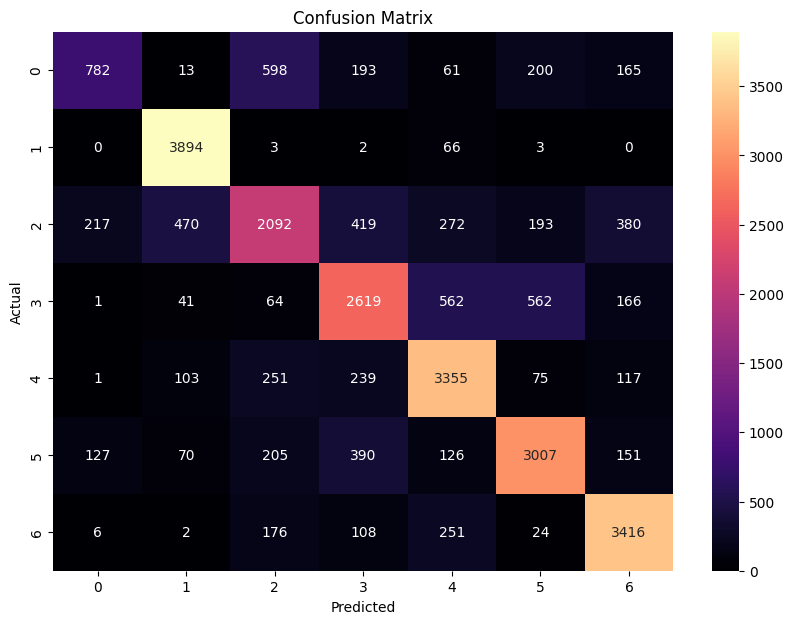

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_proba.shape

(26238, 7)

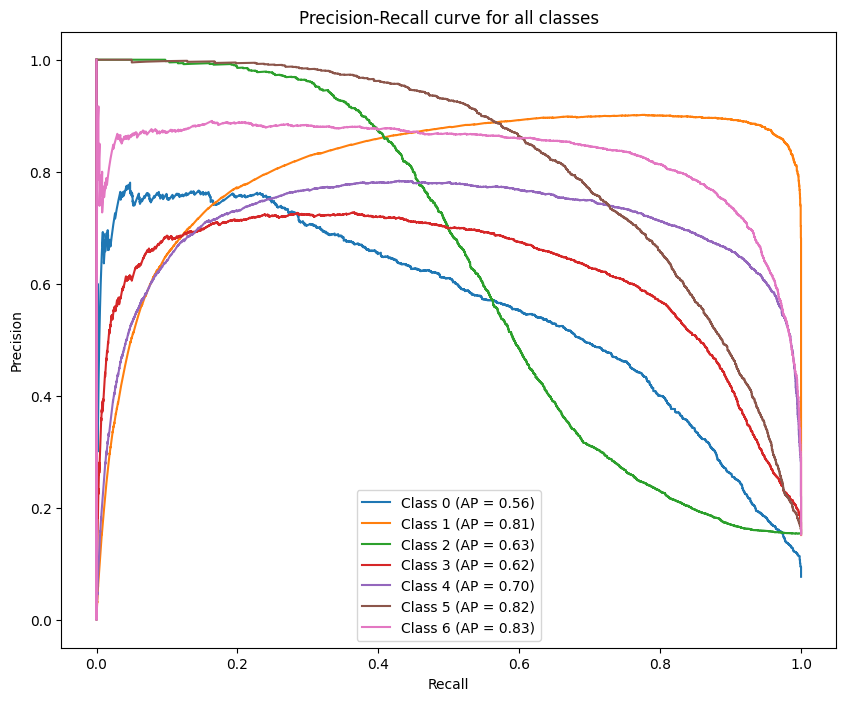

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])  # Calculate Average Precision
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()


In [ ]:
joblib.dump(logistic_regression_model, '/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/log_reg_ctgan.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/log_reg_ctgan.pkl']

## K Nearest Neighbour


In [ ]:
k = np.sqrt(len(X_train)).astype(int)
k

247

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=k)

In [ ]:
knn_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=247)

In [ ]:
y_pred = knn_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8419086820641817


In [ ]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75      2012
           1       0.91      1.00      0.95      3968
           2       0.97      0.67      0.79      4043
           3       0.72      0.90      0.80      4015
           4       0.79      0.96      0.87      4141
           5       0.90      0.71      0.79      4076
           6       0.85      0.90      0.87      3983

    accuracy                           0.84     26238
   macro avg       0.86      0.83      0.83     26238
weighted avg       0.86      0.84      0.84     26238



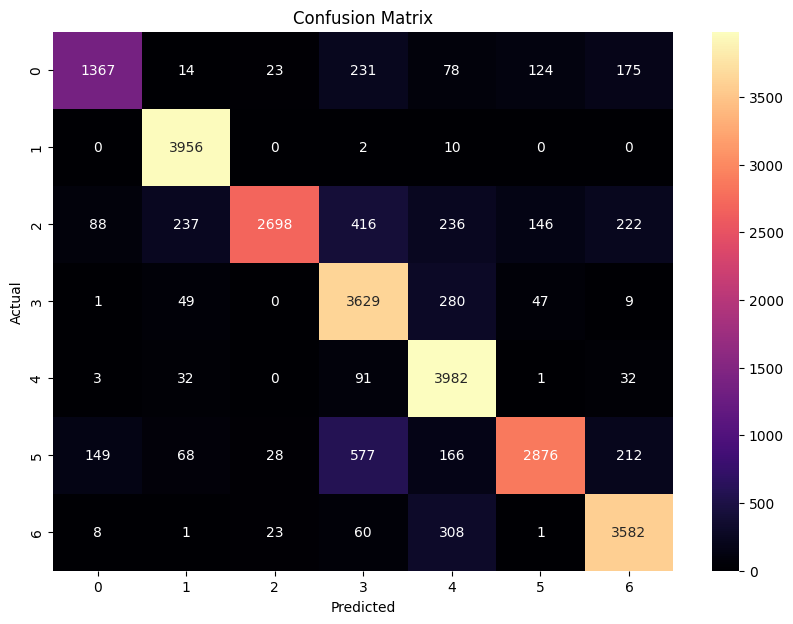

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_pred_proba = knn_classifier.predict_proba(X_test)

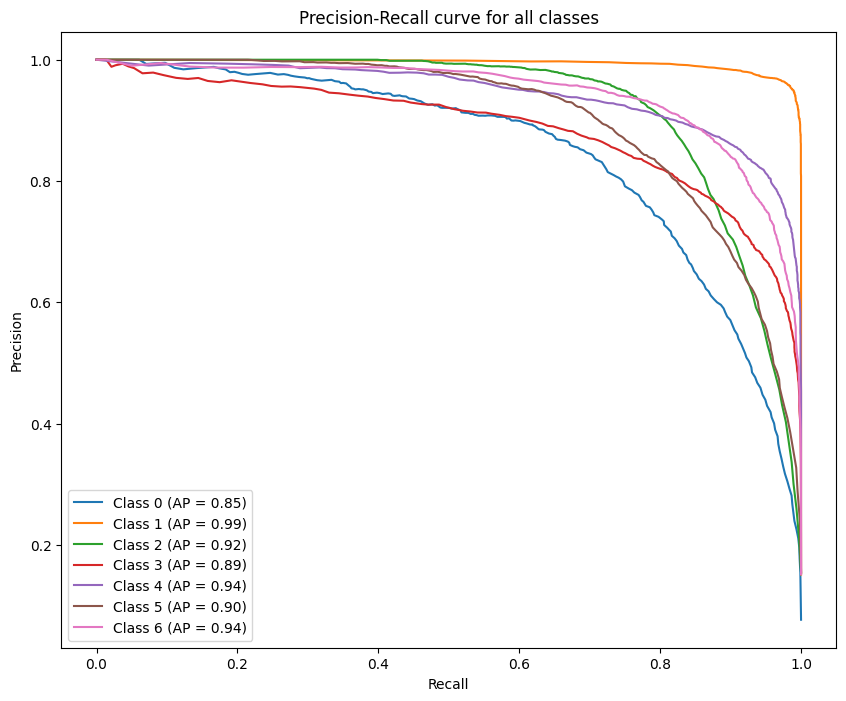

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])  # Calculate Average Precision
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
joblib.dump(knn_classifier, '/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/knn_ctgan.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/knn_ctgan.pkl']

## Naive Bayes


In [ ]:
gnb_classifier = GaussianNB()

In [ ]:
gnb_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb_classifier.predict(X_test)
y_pred_proba = gnb_classifier.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8574586477627868


In [ ]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.55      0.66      2012
           1       0.99      1.00      0.99      3968
           2       0.88      0.80      0.84      4043
           3       0.79      0.89      0.84      4015
           4       0.85      0.90      0.88      4141
           5       0.80      0.80      0.80      4076
           6       0.85      0.91      0.88      3983

    accuracy                           0.86     26238
   macro avg       0.85      0.84      0.84     26238
weighted avg       0.86      0.86      0.85     26238



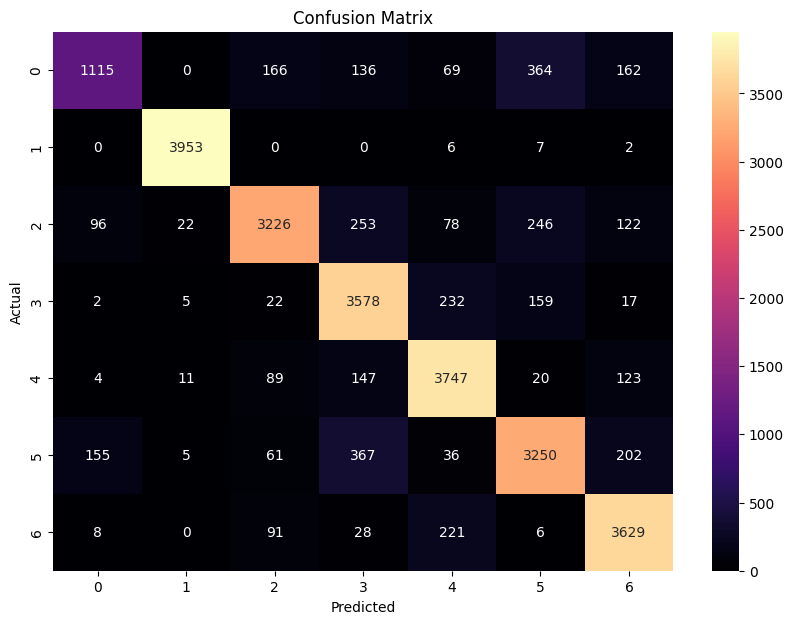

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

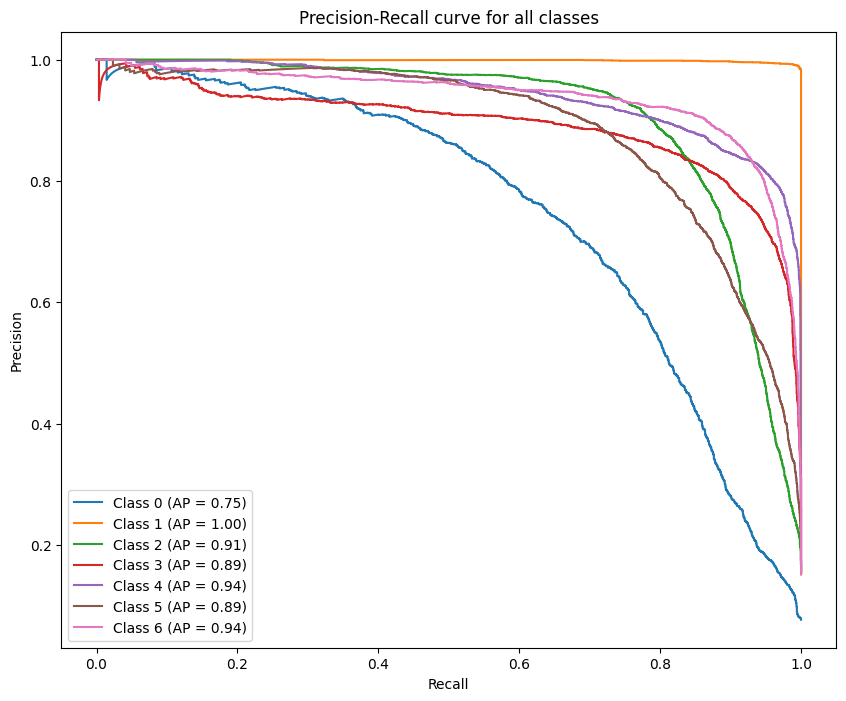

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
joblib.dump(gnb_classifier, '/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/gnb_ctgan.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/gnb_ctgan.pkl']

## Decision Tree



In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Fit the model with grid search
print("Performing grid search...")
grid_search.fit(X_train, y_train)

Performing grid search...
Fitting 10 folds for each of 540 candidates, totalling 5400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
print("\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")


Best parameters found:
class_weight: None
criterion: gini
max_depth: 15
max_features: None
min_samples_leaf: 4
min_samples_split: 2


In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [ ]:
# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")



Training Accuracy: 0.9221
Testing Accuracy: 0.8852


In [ ]:
# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      2012
           1       0.99      1.00      0.99      3968
           2       0.89      0.86      0.87      4043
           3       0.85      0.89      0.87      4015
           4       0.87      0.92      0.90      4141
           5       0.87      0.80      0.83      4076
           6       0.89      0.90      0.90      3983

    accuracy                           0.89     26238
   macro avg       0.88      0.88      0.88     26238
weighted avg       0.89      0.89      0.88     26238



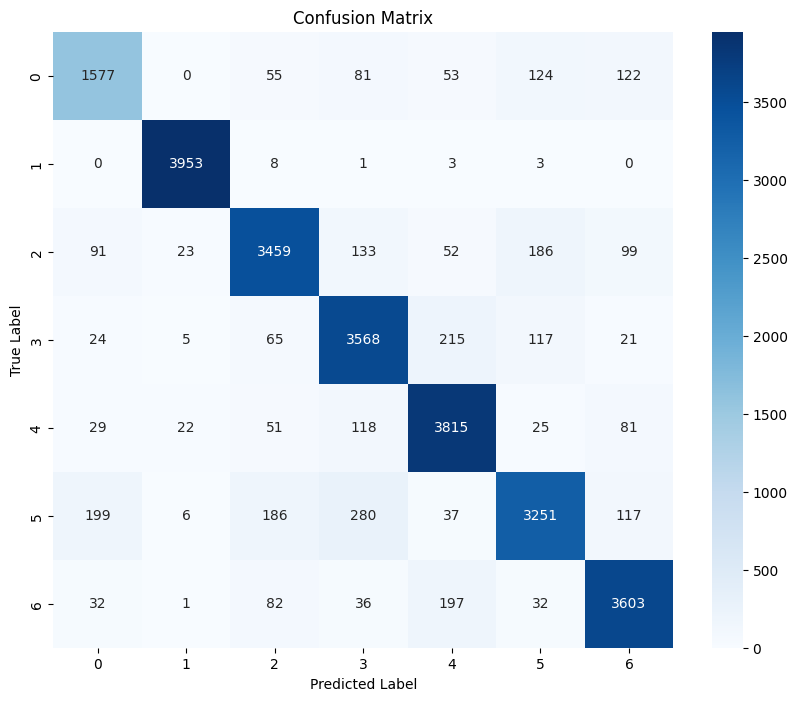

In [ ]:
# Create confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

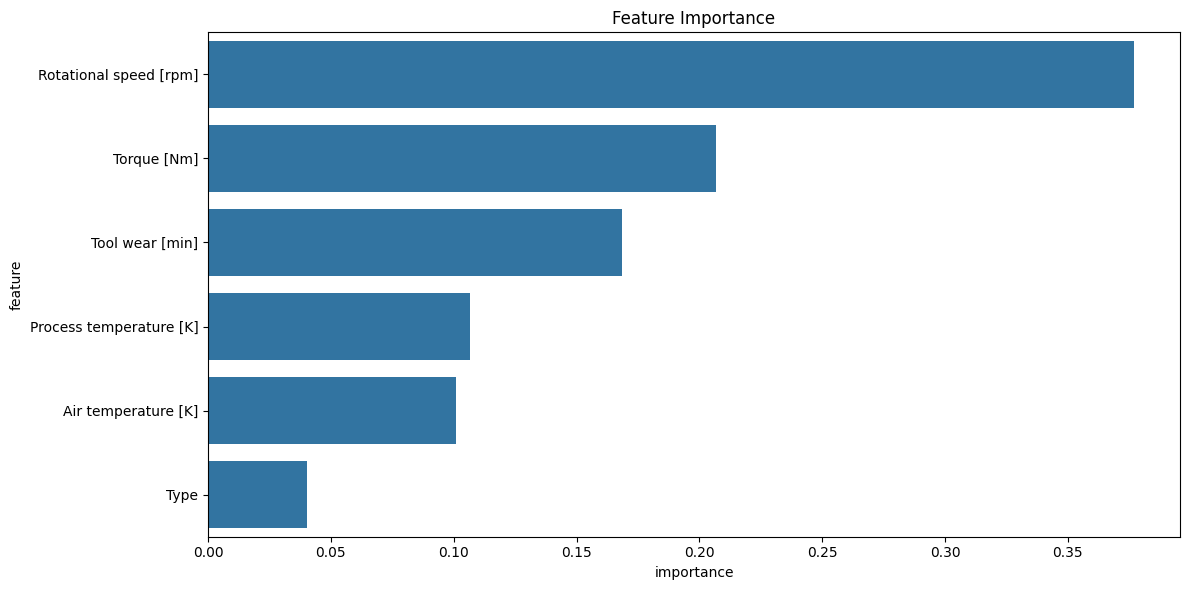

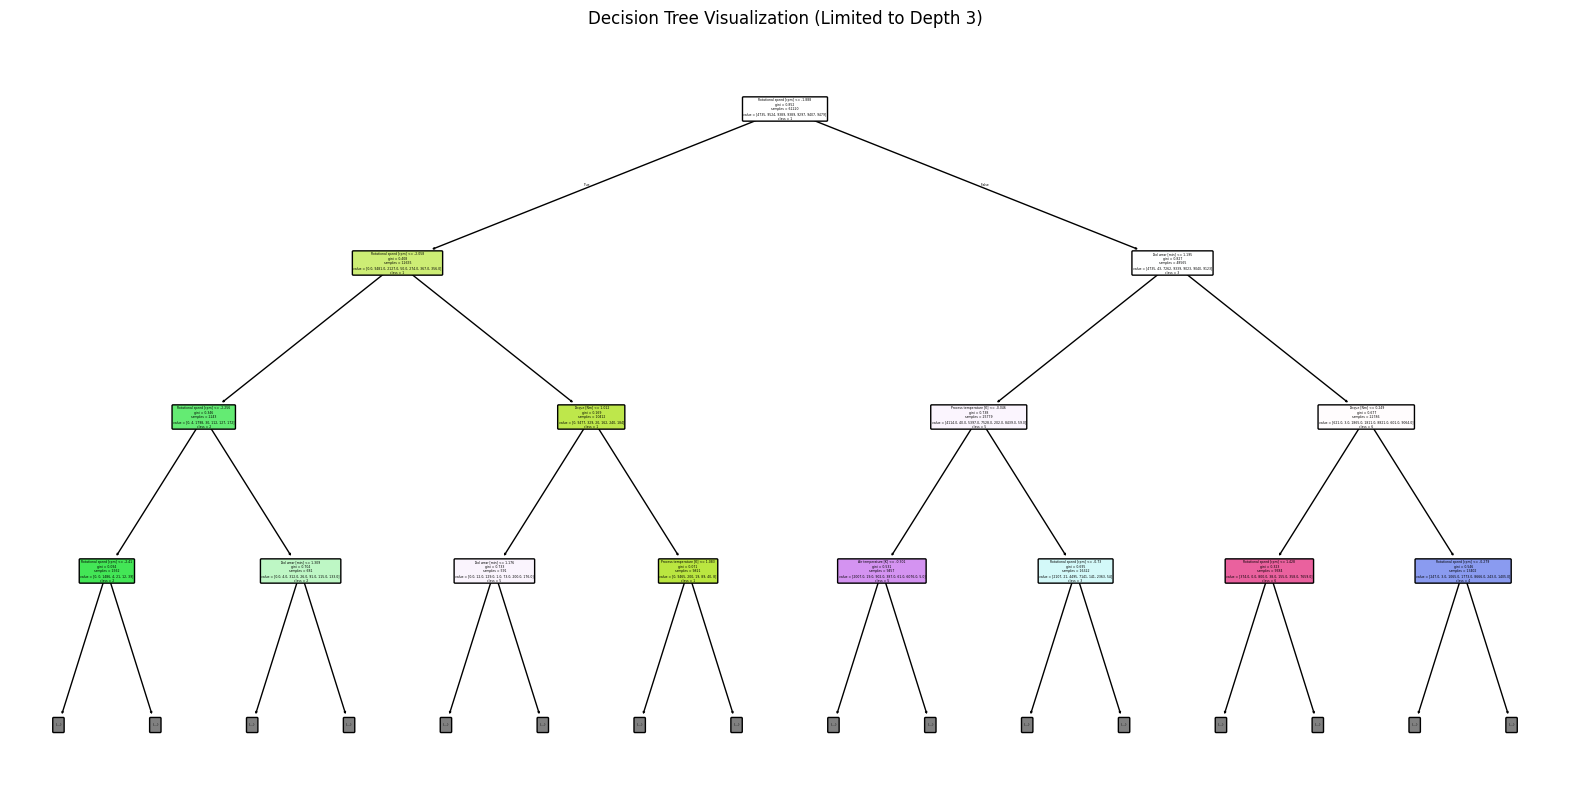

In [ ]:
# Feature importance visualization
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Visualize the decision tree (limited to max_depth=3 for visibility)
plt.figure(figsize=(20,10))
plot_tree(best_model, max_depth=3, feature_names=X_train.columns,
          class_names=[str(i) for i in range(7)], # 7 classes (0-6)
          filled=True, rounded=True)
plt.title('Decision Tree Visualization (Limited to Depth 3)')
plt.show()

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)

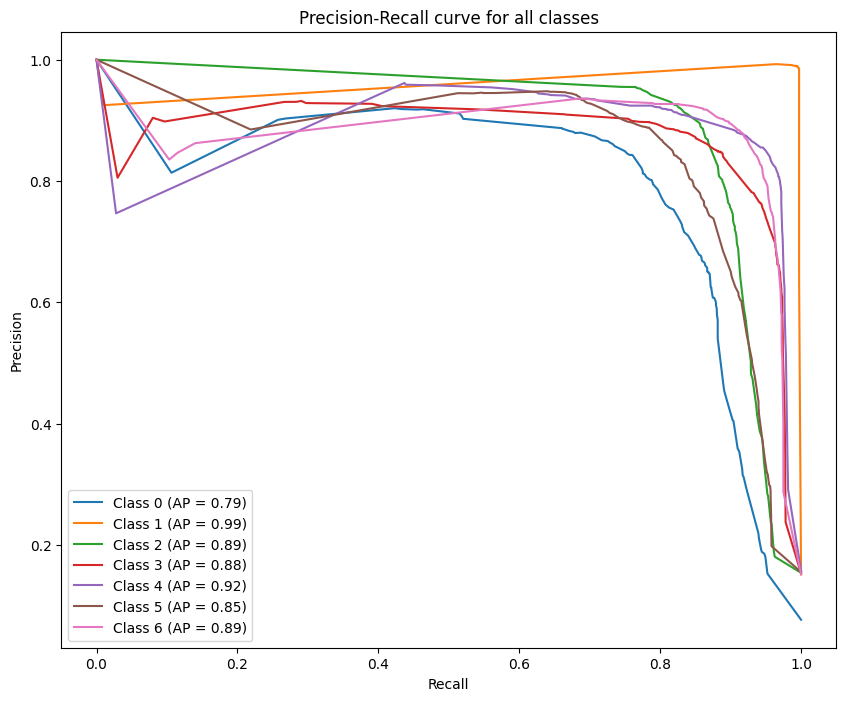

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
joblib.dump(best_model, '/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/dtree_ctgan.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/dtree_ctgan.pkl']

## SVM

In [ ]:
svm_model = SVC(kernel='rbf', probability=True)

In [ ]:
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [ ]:
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8908453388215565


In [ ]:
# Generate classification report
class_report = classification_report(y_test.values.reshape(-1), y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2012
           1       0.96      1.00      0.98      3968
           2       0.95      0.82      0.88      4043
           3       0.83      0.89      0.86      4015
           4       0.84      0.96      0.90      4141
           5       0.91      0.82      0.86      4076
           6       0.90      0.92      0.91      3983

    accuracy                           0.89     26238
   macro avg       0.89      0.88      0.88     26238
weighted avg       0.89      0.89      0.89     26238



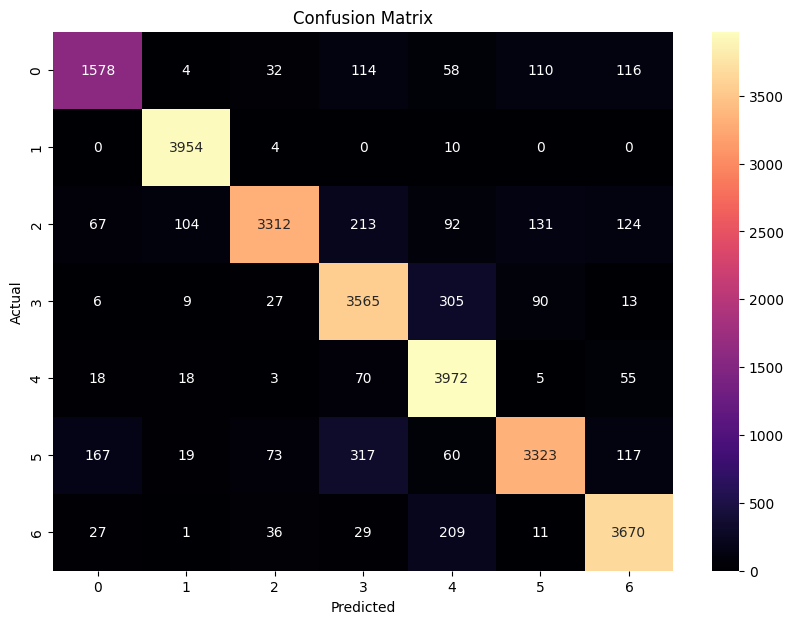

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

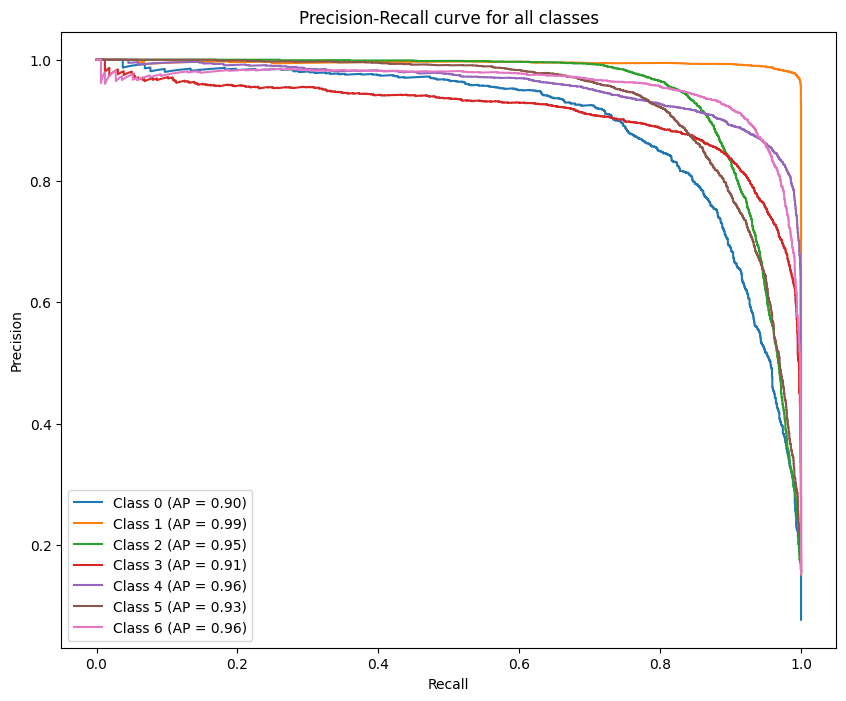

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
joblib.dump(svm_model, '/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/svm_ctgan.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/svm_ctgan.pkl']

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,        # Number of trees in the forest
    max_depth=20,            # Maximum depth of each tree
    min_samples_split=5,     # Minimum samples required to split an internal node
    min_samples_leaf=2,      # Minimum samples required to be at a leaf node
    random_state=42          # For reproducibility
)

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred_proba = rf.predict_proba(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9079579236222273
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      2012
           1       0.99      1.00      0.99      3968
           2       0.92      0.88      0.90      4043
           3       0.87      0.90      0.88      4015
           4       0.88      0.95      0.91      4141
           5       0.90      0.85      0.87      4076
           6       0.90      0.93      0.91      3983

    accuracy                           0.91     26238
   macro avg       0.91      0.90      0.90     26238
weighted avg       0.91      0.91      0.91     26238



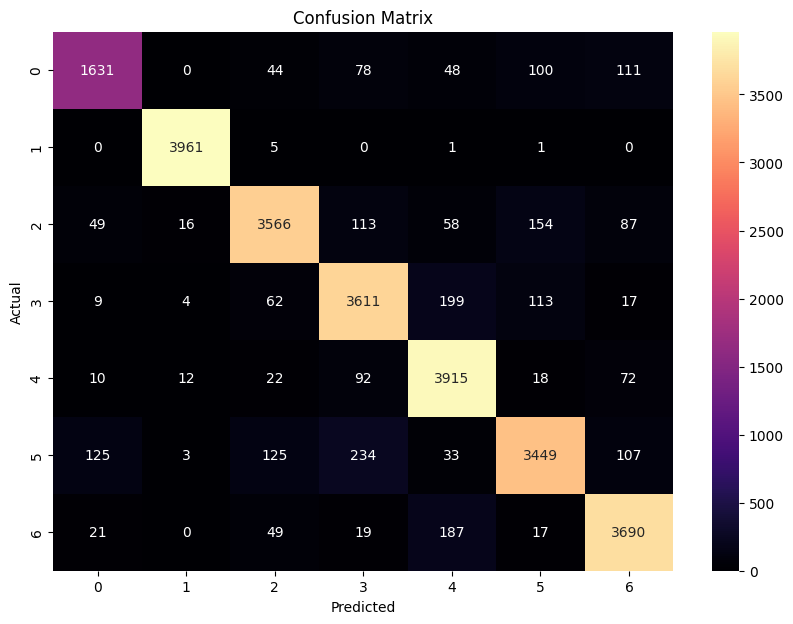

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

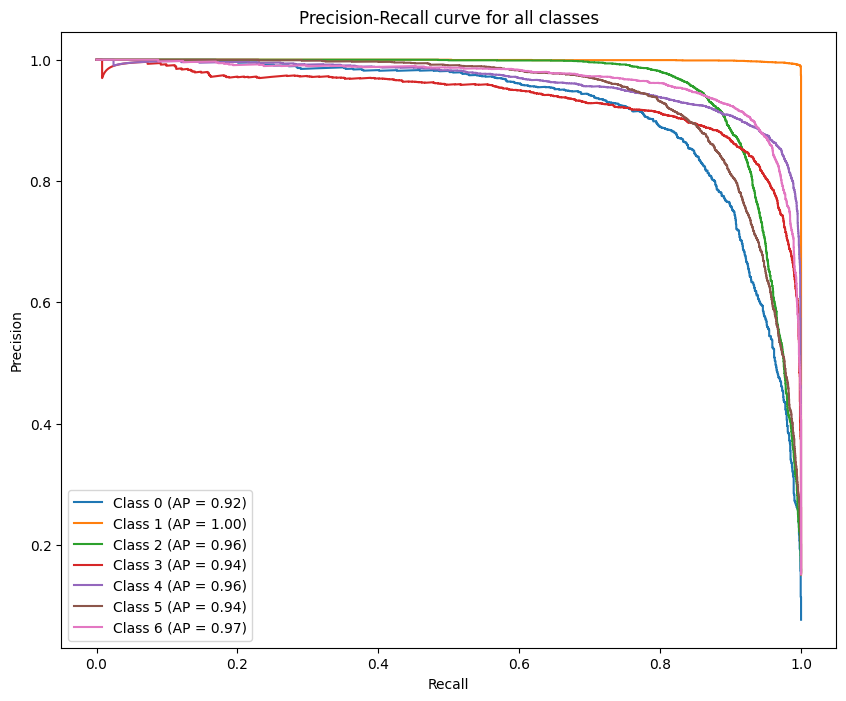

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    avg_precision = average_precision_score(y_test == i, y_pred_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for all classes')
plt.legend(loc='best')
plt.show()

In [ ]:
joblib.dump(rf, '/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/random_forest_ctgan.pkl')

['/content/drive/MyDrive/PredictiveMaintenance/Models/CTGAN/random_forest_ctgan.pkl']

## Model Comparison

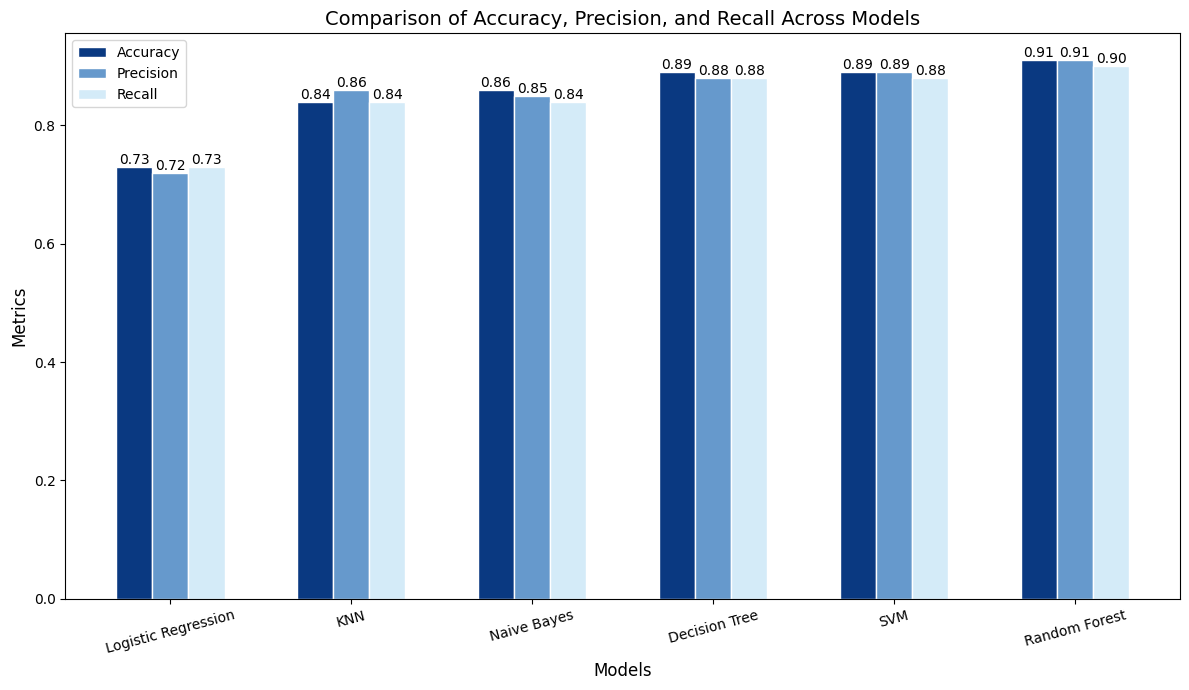

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models (updated with new accuracy value)
models = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'SVM', 'Random Forest']
accuracy = [0.73, 0.84, 0.86, 0.89, 0.89, 0.91]
precision = [0.72, 0.86, 0.85, 0.88, 0.89, 0.91]  # Macro avg from classification report
recall = [0.73, 0.84, 0.84, 0.88, 0.88, 0.90]  # Macro avg from classification report

# Bar width and positions
bar_width = 0.2  # Narrower bar width
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the joint bar graph
plt.figure(figsize=(12, 7))
bars1 = plt.bar(r1, accuracy, color='#0A3981', width=bar_width, edgecolor='white', label='Accuracy')
bars2 = plt.bar(r2, precision, color='#6699cc', width=bar_width, edgecolor='white', label='Precision')
bars3 = plt.bar(r3, recall, color='#D4EBF8', width=bar_width, edgecolor='white', label='Recall')

# Adding labels, title, and legend
plt.xlabel('Models', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Accuracy, Precision, and Recall Across Models', fontsize=14)
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=15)
plt.legend()

# Adding values on top of each bar
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars3:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


